In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder

In [53]:
df = pd.read_csv("../../dataset/Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


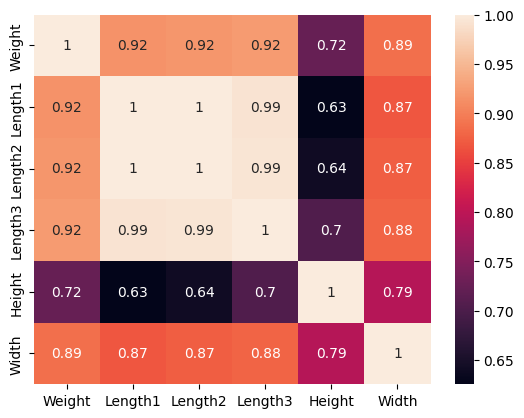

In [54]:
corr = df.select_dtypes(include=np.number).corr()
dataplot = sb.heatmap(corr, annot=True)
plt.show()

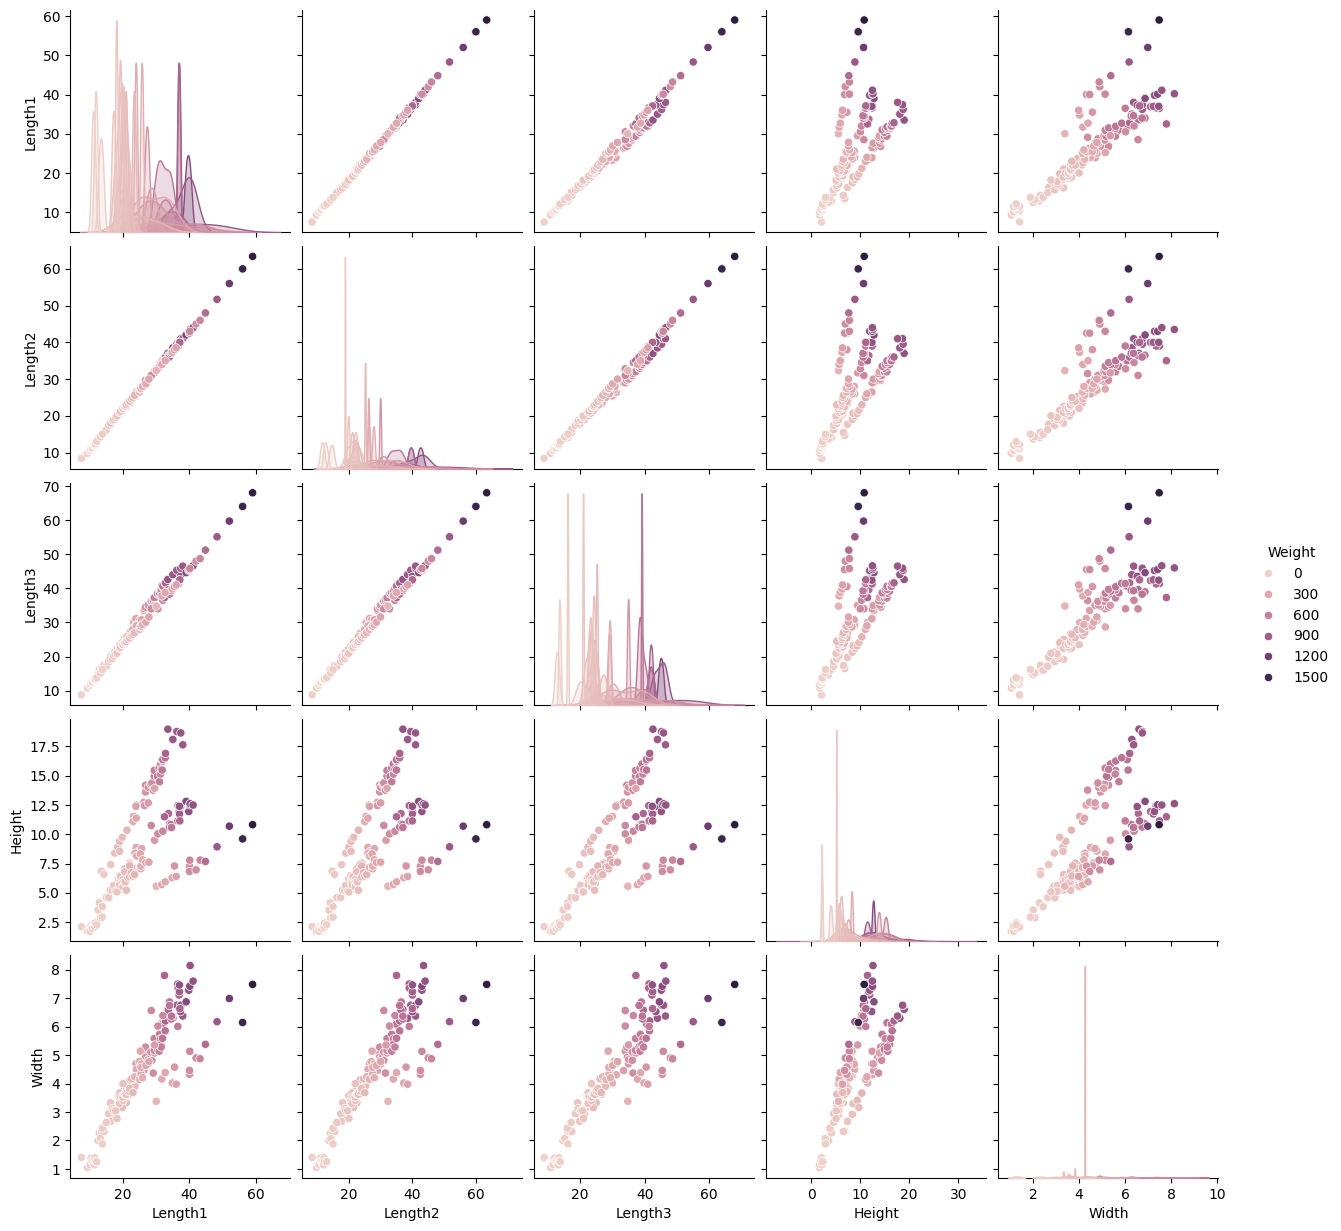

In [55]:
sb.pairplot(df, hue='Weight')

In [56]:
species_counts = df.Species.value_counts()
species_counts

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

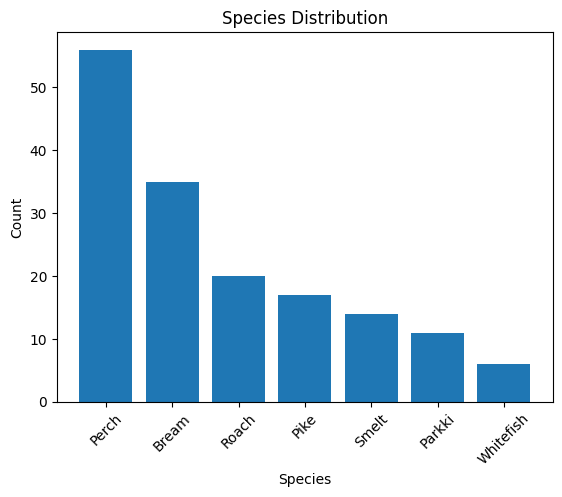

In [57]:

plt.bar(species_counts.index, species_counts.values)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

In [58]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

In [59]:
categorical_train = df_train.select_dtypes(exclude = np.number).columns

In [60]:
categorical_test = df_test.select_dtypes(exclude = np.number).columns

In [61]:
df1_train= df_train.copy()
classes = dict()
le = LabelEncoder()
for col in categorical_train:
    df1_train[col]= le.fit_transform(df1_train[col])
    classes[col] = le.classes_

df1_train

,Species,Weight,Length1,Length2,Length3,Height,Width
85,2,130.0,19.3,21.3,22.8,6.3840,3.5340
81,2,85.0,18.2,20.0,21.0,5.0820,2.7720
112,2,685.0,34.0,36.5,39.0,10.8810,6.8640
11,0,500.0,28.7,31.0,36.2,14.3714,4.8146
109,2,514.0,30.5,32.8,34.0,10.0300,6.0180
...,...,...,...,...,...,...,...
71,1,300.0,24.0,26.0,29.0,11.3680,4.2340
106,2,250.0,25.9,28.0,29.4,7.8204,4.2042
14,0,600.0,29.4,32.0,37.2,14.9544,5.1708
92,2,150.0,20.5,22.5,24.0,6.7920,3.6240


In [62]:
df1_test= df_test.copy()
classes = dict()
le = LabelEncoder()
for col in categorical_test:
    df1_test[col]= le.fit_transform(df1_test[col])
    classes[col] = le.classes_

df1_test

,Species,Weight,Length1,Length2,Length3,Height,Width
78,2,78.0,16.8,18.7,19.4,5.1992,3.1234
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
128,3,200.0,30.0,32.3,34.8,5.5680,3.3756
55,6,270.0,23.6,26.0,28.7,8.3804,4.2476
94,2,150.0,21.0,23.0,24.5,5.2185,3.6260
29,0,1000.0,33.5,37.0,42.6,18.9570,6.6030
147,5,7.0,10.1,10.6,11.6,1.7284,1.1484
51,4,180.0,23.6,25.2,27.9,7.0866,3.9060
98,2,188.0,22.6,24.6,26.2,6.7334,4.1658
141,3,1250.0,52.0,56.0,59.7,10.6863,6.9849


In [64]:
x_train= df1_train.drop(columns='Weight').values
y_train = df1_train['Weight'].values

x_test = df1_test.drop(columns='Weight').values
y_test = df1_test['Weight'].values

In [65]:
scaler = StandardScaler()  

# Fit the scaler on the training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data
x_test_scaled = scaler.transform(x_test)

In [66]:
model = LinearRegression() # ols
model.fit(x_train_scaled, y_train)

LinearRegression()

In [67]:
y_pred = model.predict(x_test_scaled)
y_pred[:10]

array([  80.07724579, -125.24034251,  407.23604383,  420.33255446,
        154.68134237,  829.25717194, -198.26492201,  287.5025114 ,
        250.72762277, 1176.70354731])

In [68]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [69]:
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

MSE: 14037.326268929299
MAE: 90.35687780468008
R²: 0.8854038212498819
